## Observations and Insights 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_df = study_results.merge(mouse_metadata, on = "Mouse ID")
combined_df.head()
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
number_mice = combined_df["Mouse ID"].nunique()
number_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df=combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#This step returns an array of ALL duplicated mouse data. Although our data only has 1 duplicate, if there were more this array would be longer
duplicated_mice = duplicated_mouse_df["Mouse ID"].unique()
duplicated_mice


array(['g989'], dtype=object)

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#The for loop only goes 1 time in our case, but in other datasets this could run multiple times
clean_df=combined_df
for mouseid in duplicated_mice:
    clean_df=clean_df[clean_df["Mouse ID"]!= mouseid]

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group=clean_df.groupby("Drug Regimen")
regimens=regimen_group["Tumor Volume (mm3)"]
means=regimens.mean()
meds=regimens.median()
variance = regimens.var()
stdevs = regimens.std()
sems = regimens.sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": means,
              "Median": meds,
              "Variance": variance,
              "Standard Deviation": stdevs,
              "SEM": sems})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
other_sum_df = clean_df.groupby("Drug Regimen").agg(['mean','median', 'var','std','sem'])["Tumor Volume (mm3)"]
other_sum_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

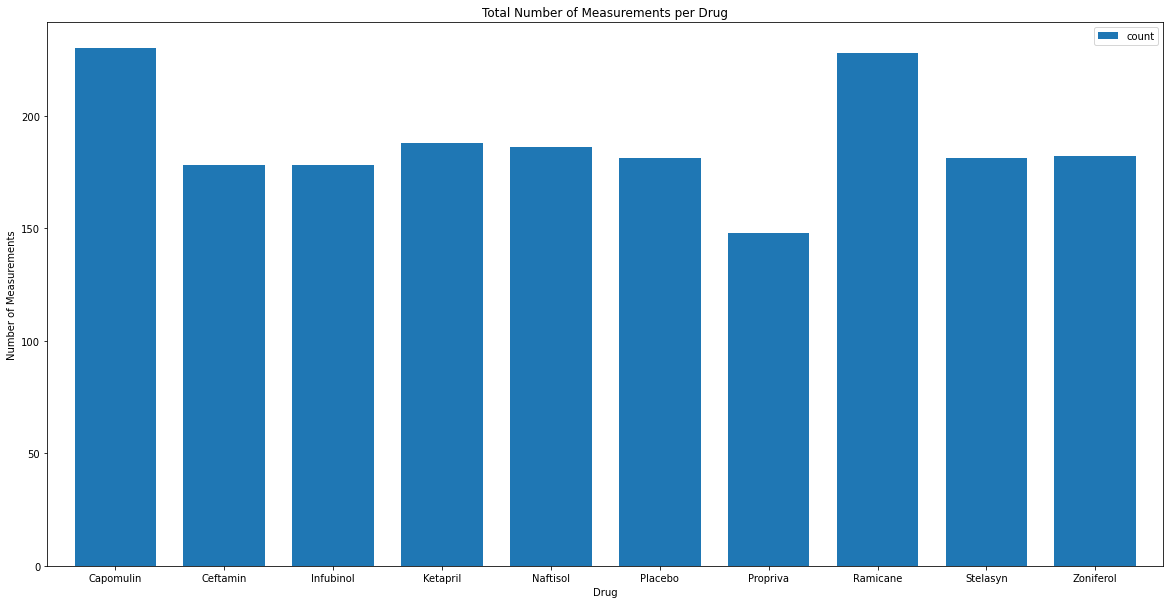

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
panda_bar_df=clean_df.groupby("Drug Regimen").agg(['count'])["Mouse ID"]
ax=panda_bar_df.plot(kind='bar',y="count", figsize=(20,10),title="Total Number of Measurements per Drug", rot=0,width=0.75)
plt.xlabel("Drug")
plt.ylabel("Number of Measurements")


Text(0, 0.5, 'Number of Measurements')

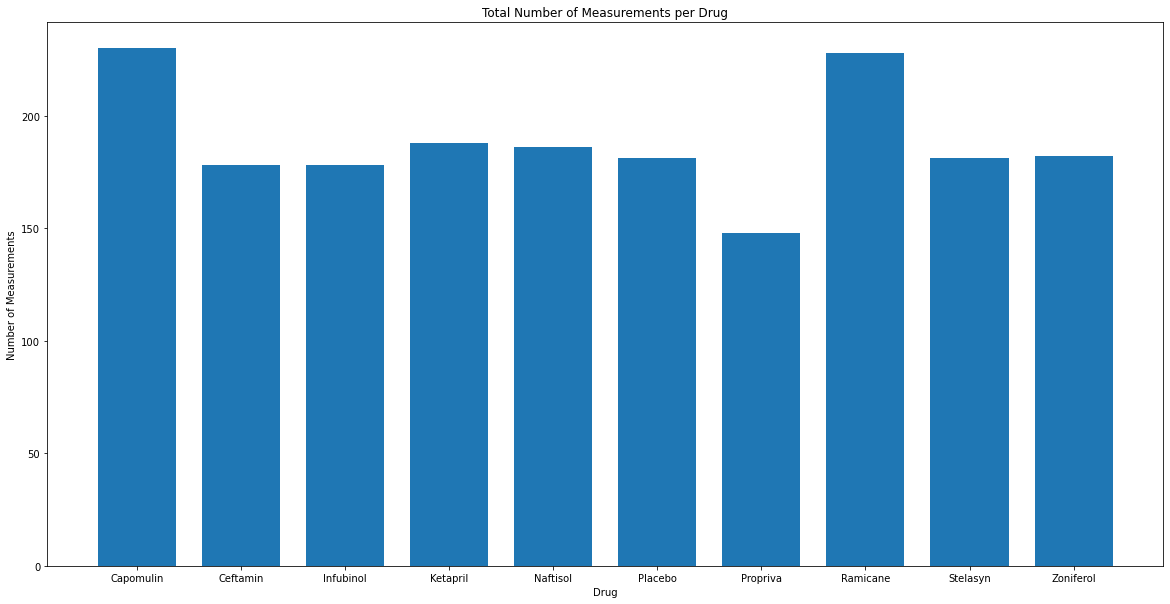

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements=regimen_group["Mouse ID"].count()
pyplotfig=plt.figure(figsize=(20,10))
plt.bar(other_sum_df.index.to_list(),measurements, width=0.75)
plt.title("Total Number of Measurements per Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Measurements")


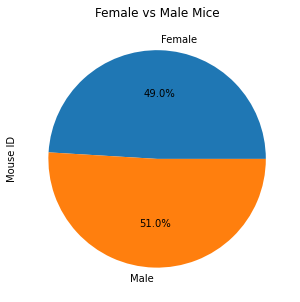

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts=clean_df.groupby("Sex")["Mouse ID"].count()
panda_pie = gender_counts.plot(kind='pie', figsize=(5,5),autopct="%1.1f%%", title = "Female vs Male Mice")

Text(0.5, 1.0, 'Female vs Male Mice')

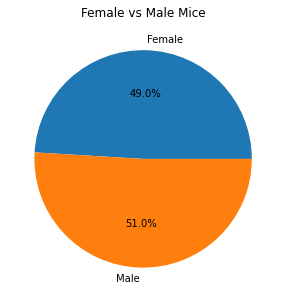

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts=clean_df.groupby("Sex")["Mouse ID"]
y_axis=gender_counts.count()
x_axis=clean_df.groupby("Sex").count().index.to_list()
pyplotpie = plt.figure(figsize=(5,5))
plt.pie(y_axis,labels=x_axis, autopct = "%1.1f%%")
plt.title("Female vs Male Mice")


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
options=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
reduced_df=clean_df[clean_df["Drug Regimen"].isin(options)]
reduced_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [17]:
# Start by getting the last (greatest) timepoint for each mouse
maxes=reduced_df.groupby("Mouse ID").max()["Timepoint"]
mice=maxes.index.to_list()
last_time_mice = pd.DataFrame({
                               "Timepoint": maxes})
last_time_mice.reset_index(level=0, inplace = True)
last_time_mice

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [18]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = combined_df.merge(last_time_mice, how='inner', on=["Mouse ID", "Timepoint"])
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_Cap = new_df[new_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
tumor_vol_data_Ram=new_df[new_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
tumor_vol_data_Inf=new_df[new_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
tumor_vol_data_Cef=new_df[new_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Cap
quartiles_Cap=tumor_vol_data_Cap.quantile([0.25,0.5,0.75])
lowerq_Cap=quartiles_Cap[0.25]
upperq_Cap=quartiles_Cap[0.75]
iqr_Cap=upperq_Cap-lowerq_Cap
lower_bound_Cap = lowerq_Cap - (1.5*iqr_Cap)
upper_bound_Cap = upperq_Cap + (1.5*iqr_Cap)
potential_outliers_cap=[(tumor_vol_data_Cap>upper_bound_Cap)|(tumor_vol_data_Cap<lower_bound_Cap)]
potential_outliers_cap=np.where(potential_outliers_cap)[0]
#Ram
quartiles_Ram=tumor_vol_data_Ram.quantile([0.25,0.5,0.75])
lowerq_Ram=quartiles_Ram[0.25]
upperq_Ram=quartiles_Ram[0.75]
iqr_Ram=upperq_Ram-lowerq_Ram
lower_bound_Ram = lowerq_Ram - (1.5*iqr_Ram)
upper_bound_Ram = upperq_Ram + (1.5*iqr_Ram)
potential_outliers_Ram=[(tumor_vol_data_Ram>upper_bound_Ram)|(tumor_vol_data_Ram<lower_bound_Ram)]
potential_outliers_Ram=np.where(potential_outliers_Ram)[0]
#Inf
quartiles_Inf=tumor_vol_data_Inf.quantile([0.25,0.5,0.75])
lowerq_Inf=quartiles_Inf[0.25]
upperq_Inf=quartiles_Inf[0.75]
iqr_Inf=upperq_Inf-lowerq_Inf
lower_bound_Inf = lowerq_Inf - (1.5*iqr_Inf)
upper_bound_Inf = upperq_Inf + (1.5*iqr_Inf)
potential_outliers_Inf=[(tumor_vol_data_Inf>upper_bound_Inf)|(tumor_vol_data_Inf<lower_bound_Inf)]
potential_outliers_Inf=np.where(potential_outliers_Inf)[0]
#Cef
quartiles_Cef=tumor_vol_data_Cef.quantile([0.25,0.5,0.75])
lowerq_Cef=quartiles_Cef[0.25]
upperq_Cef=quartiles_Cef[0.75]
iqr_Cef=upperq_Cef-lowerq_Cef
lower_bound_Cef = lowerq_Cef - (1.5*iqr_Cef)
upper_bound_Cef = upperq_Cef + (1.5*iqr_Cef)
potential_outliers_cef=[(tumor_vol_data_Cef>upper_bound_Cef)|(tumor_vol_data_Cef<lower_bound_Cef)]
potential_outliers_cef=np.where(potential_outliers_cef)[0]
    
print(f"Capomulin has {len(potential_outliers_cap)} potential outliers.")
print(f"Ramicane has {len(potential_outliers_Ram)} potential outliers.")
print(f"Infubinol has {len(potential_outliers_Inf)} potential outliers.")
print(f"Ceftamin has {len(potential_outliers_cef)} potential outliers.")
    

Capomulin has 0 potential outliers.
Ramicane has 0 potential outliers.
Infubinol has 1 potential outliers.
Ceftamin has 0 potential outliers.


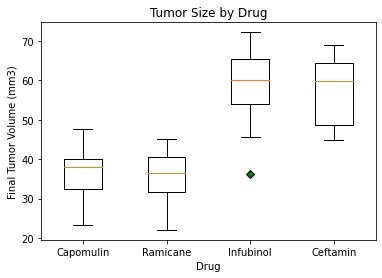

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size by Drug')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug')
ax1.boxplot([tumor_vol_data_Cap, tumor_vol_data_Ram, tumor_vol_data_Inf,tumor_vol_data_Cef], labels=treatments,flierprops=dict(markerfacecolor='g', marker='D'))
plt.show()

## Line and Scatter Plots

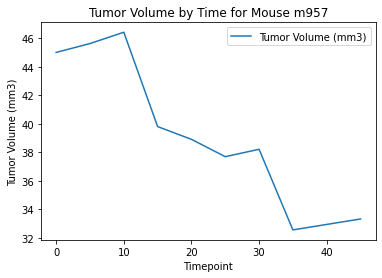

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse_df = clean_df[clean_df["Mouse ID"]=="m957"]
single_plot=single_mouse_df.plot.line("Timepoint","Tumor Volume (mm3)")
plt.title("Tumor Volume by Time for Mouse m957")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

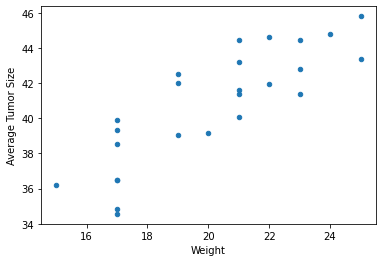

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mice_df = clean_df[clean_df["Drug Regimen"]=="Capomulin"]
cap_mice_group_df=pd.DataFrame({"Average Tumor Size": cap_mice_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(), 
                                 "Weight": cap_mice_df.groupby("Mouse ID")["Weight (g)"].mean()})
scatter_plot=cap_mice_group_df.plot.scatter("Weight", "Average Tumor Size")
plt.show()

## Correlation and Regression

Text(18, 35, 'y = 0.95x + 21.55')

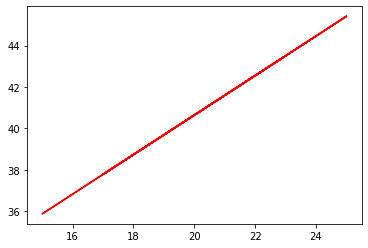

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#First make plot from before
cap_mice_df = clean_df[clean_df["Drug Regimen"]=="Capomulin"]
cap_mice_group_df=pd.DataFrame({"Average Tumor Size": cap_mice_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(), 
                                 "Weight": cap_mice_df.groupby("Mouse ID")["Weight (g)"].mean()})
scatter_plot=cap_mice_group_df.plot.scatter("Weight", "Average Tumor Size")
#then
x_values = cap_mice_group_df["Weight"]
y_values = cap_mice_group_df["Average Tumor Size"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,35),fontsize=15,color="red")